In [39]:
# import libs for future useage
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from urllib.request import Request, urlopen
import numpy as np
from scipy import stats
from bs4 import BeautifulSoup

In [5]:
# read data only using the first 20 rows of the data
response = urllib.request.urlopen("https://raw.githubusercontent.com/fenghuanghao1986/.spyder-py3/master/BusinessData.csv")
data = pd.read_csv(response)
data.head(10)

,OrderDate,ProductID,ProductName,Quantity,UnitPrice,UnitCost,CustomerID,Customer,SalesRep
0,1/1/2015,22,Pop Rocks,410,24.0,18,315,Joe's Diner,Ragan Smith
1,1/1/2015,16,Sugar Daddy,900,15.0,14,315,Joe's Diner,Connor McDavid
2,1/2/2015,30,Swedish Fish,270,NaN,8,233,Bert's Bistro,Patrick Kane
3,1/3/2015,16,Sugar Daddy,670,NaN,14,14,Kid Kool Shop,Connor McDavid
4,1/4/2015,2,Milk Duds,790,NaN,6,572,Mr. Biggs,Patrick Kane
5,1/4/2015,22,Pop Rocks,410,NaN,18,315,Joe's Diner,Ragan Smith
6,1/4/2015,16,Sugar Daddy,900,NaN,14,315,Joe's Diner,Connor McDavid
7,1/5/2015,30,Swedish Fish,270,12.0,8,233,Bert's Bistro,Patrick Kane
8,1/6/2015,16,Sugar Daddy,670,15.0,14,14,Kid Kool Shop,Connor McDavid
9,1/7/2015,2,Milk Duds,790,12.0,6,572,Mr. Biggs,Patrick Kane


In [13]:
# clean data check missing data
nullCheck = data.isnull()
nullCheck
# from the out we can see some data missing
# filling them with  average value of that colunm
data.fillna(data.UnitPrice.mean(), inplace=True)
data.head(10)

,OrderDate,ProductID,ProductName,Quantity,UnitPrice,UnitCost,CustomerID,Customer,SalesRep
0,1/1/2015,22,Pop Rocks,410,24.000000,18,315,Joe's Diner,Ragan Smith
1,1/1/2015,16,Sugar Daddy,900,15.000000,14,315,Joe's Diner,Connor McDavid
2,1/2/2015,30,Swedish Fish,270,17.512706,8,233,Bert's Bistro,Patrick Kane
3,1/3/2015,16,Sugar Daddy,670,17.512706,14,14,Kid Kool Shop,Connor McDavid
4,1/4/2015,2,Milk Duds,790,17.512706,6,572,Mr. Biggs,Patrick Kane
5,1/4/2015,22,Pop Rocks,410,17.512706,18,315,Joe's Diner,Ragan Smith
6,1/4/2015,16,Sugar Daddy,900,17.512706,14,315,Joe's Diner,Connor McDavid
7,1/5/2015,30,Swedish Fish,270,12.000000,8,233,Bert's Bistro,Patrick Kane
8,1/6/2015,16,Sugar Daddy,670,15.000000,14,14,Kid Kool Shop,Connor McDavid
9,1/7/2015,2,Milk Duds,790,12.000000,6,572,Mr. Biggs,Patrick Kane


In [15]:
# check statistics using describe
stctCheck = data.describe()
# since we have count, mean, std, min, max by using describe
# have to check 5 more other statistic function
functions = ['sum', 'median', 'var', 'prod', 'mad']
extraStctCheck = data.groupby(data.SalesRep).agg({'Quantity':functions,
                                                  'UnitPrice':functions,
                                                  'UnitCost': functions})
print(stctCheck)
print(extraStctCheck)


        ProductID      Quantity   UnitPrice    UnitCost  CustomerID
count  674.000000    674.000000  674.000000  674.000000  674.000000
mean    31.313056    562.443620   17.512706   12.305638  305.522255
std     31.203044   2195.619451   10.544263    7.332786  314.690055
min      2.000000      0.000000    8.000000    4.000000    6.000000
25%     16.000000    220.000000    9.000000    7.000000   14.000000
50%     22.000000    480.000000   15.000000   12.000000   95.000000
75%     31.000000    720.000000   21.000000   14.000000  572.000000
max    100.000000  56984.000000   55.000000   35.000000  846.000000
               Quantity                                                  \
                    sum median           var           prod         mad   
SalesRep                                                                  
Connor McDavid   162893    460  1.453071e+07            inf  572.011834   
Patrick Kane     188268    490  8.240737e+04            NaN  244.556469   
Ragan Smith  

In [18]:
# do the cov and corr
unitData = pd.DataFrame(data.UnitPrice)
unitData['UnitCost'] = data.UnitCost
unitCov = unitData.cov()
unitCorr = unitData.corr()
print(unitCov)
print(unitCorr)

            UnitPrice   UnitCost
UnitPrice  111.181489  70.603838
UnitCost    70.603838  53.769745
           UnitPrice  UnitCost
UnitPrice   1.000000  0.913152
UnitCost    0.913152  1.000000


In [24]:
# creat function use .apply()
# function will calculate the profit
# simple function just for demo the usage of function
def profit(price, cost):
    prof = price - cost
    percentage = prof / cost
    return percentage
prof = profit(unitData.UnitPrice, unitData.UnitCost)
# add prof to the end of the end of dataframe
unitData['Profit'] = prof
applyTest = unitData.apply(functions)
print(applyTest)

           UnitPrice     UnitCost         Profit
sum     1.180356e+04  8294.000000   3.370655e+02
median  1.500000e+01    12.000000   4.400000e-01
var     1.111815e+02    53.769745   1.305259e-01
prod             inf     0.000000 -5.218068e-309
mad     7.842810e+00     5.661571   3.053584e-01


In [20]:
# crosstab() pivot usage
crs = pd.crosstab(data.SalesRep, data.Quantity, margins=True)
piv = data.pivot_table(index='SalesRep')
print(crs)
print(piv)

Quantity        0  10  20  30  40  45  50  60  70  80 ...   954  955  960  \
SalesRep                                              ...                   
Connor McDavid  0   2   4   1   5   1   5   2   1   3 ...     0    1    3   
Patrick Kane    1   4   5   4   6   0  12   4   4   5 ...     1    0    0   
Ragan Smith     0   0   0   1   1   0   1   1   3   0 ...     0    0    1   
All             1   6   9   6  12   1  18   7   8   8 ...     1    1    4   

Quantity        966  970  980  987  990  56984  All  
SalesRep                                             
Connor McDavid    0    2    3    0    2      1  221  
Patrick Kane      1    3    4    1    2      0  394  
Ragan Smith       0    0    0    0    0      0   59  
All               1    5    7    1    4      1  674  

[4 rows x 146 columns]
                CustomerID  ProductID    Quantity   UnitCost  UnitPrice
SalesRep                                                               
Connor McDavid  226.787330  34.841629  737.07

In [21]:
# create loop for new dataframe
rows = data[:3]
for i in range(1,10):
    newData = data[:i]
newData


,OrderDate,ProductID,ProductName,Quantity,UnitPrice,UnitCost,CustomerID,Customer,SalesRep
0,1/1/2015,22,Pop Rocks,410,24.000000,18,315,Joe's Diner,Ragan Smith
1,1/1/2015,16,Sugar Daddy,900,15.000000,14,315,Joe's Diner,Connor McDavid
2,1/2/2015,30,Swedish Fish,270,17.512706,8,233,Bert's Bistro,Patrick Kane
3,1/3/2015,16,Sugar Daddy,670,17.512706,14,14,Kid Kool Shop,Connor McDavid
4,1/4/2015,2,Milk Duds,790,17.512706,6,572,Mr. Biggs,Patrick Kane
5,1/4/2015,22,Pop Rocks,410,17.512706,18,315,Joe's Diner,Ragan Smith
6,1/4/2015,16,Sugar Daddy,900,17.512706,14,315,Joe's Diner,Connor McDavid
7,1/5/2015,30,Swedish Fish,270,12.000000,8,233,Bert's Bistro,Patrick Kane
8,1/6/2015,16,Sugar Daddy,670,15.000000,14,14,Kid Kool Shop,Connor McDavid


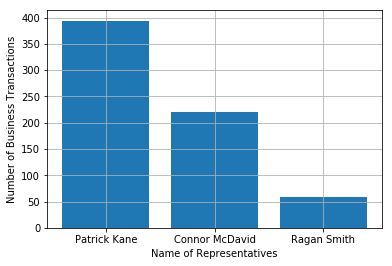

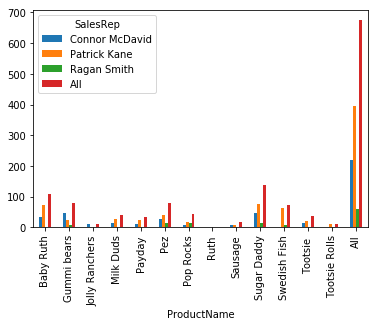

In [25]:
# plots
# bar chart
counts = pd.value_counts(data.SalesRep)
counts = pd.DataFrame(counts)
plt.grid(True)
objects = tuple(counts.index)
plt.bar(np.arange(len(counts.index)), counts.SalesRep)
plt.xticks(np.arange(3),objects)
plt.xlabel('Name of Representatives')
plt.ylabel('Number of Business Transactions')
plt.show()  
SalesRep_ProdCount = pd.crosstab(data.ProductName, data.SalesRep, margins=True)
SalesRep_ProdCount = pd.DataFrame(SalesRep_ProdCount) 
SalesRep_ProdCount.plot.bar() 

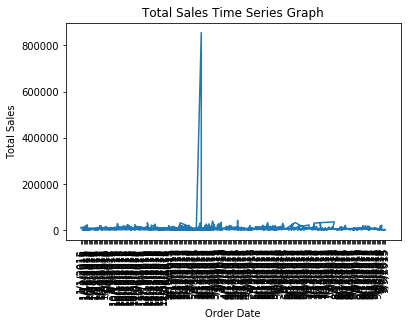

In [26]:
# line plot
data["TotalSales"] = data.UnitPrice * data.Quantity   
plt.figure()
plt.plot(data.OrderDate, data.TotalSales)
plt.xticks(rotation=90)
plt.title("Total Sales Time Series Graph")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.show()

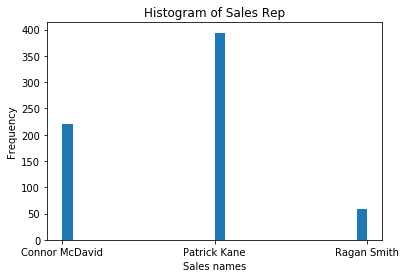

In [27]:
# hitgram
plt.hist(data.SalesRep, bins = 30)
plt.title("Histogram of Sales Rep")
plt.xlabel("Sales names")
plt.ylabel("Frequency")
plt.show()

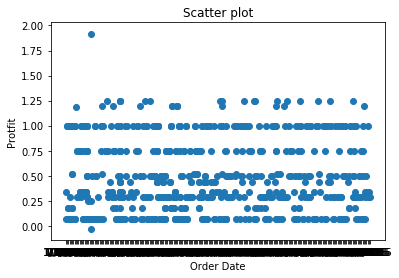

In [28]:
# scatter plot
plt.figure()
plt.scatter(data.OrderDate, unitData.Profit)
plt.title("Scatter plot")
plt.xlabel("Order Date")
plt.ylabel("Protfit")
plt.show()

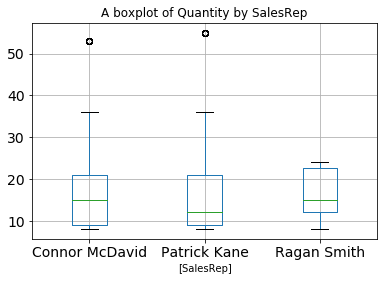

In [29]:
# box-plot
data[["UnitPrice", "SalesRep"]].boxplot(by="SalesRep", fontsize=14) # regular pandas boxplot 
plt.suptitle("")
plt.title("A boxplot of Quantity by SalesRep")
plt.show()

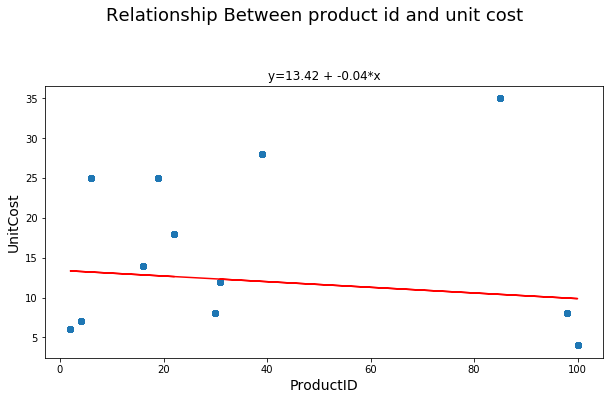

In [31]:
# regression
x = data["ProductID"]
y = data["UnitCost"]
Results = stats.linregress(x,y)
slope=Results[0]
intercept = Results[1]
rsquared = Results[2]*2
pvalue = Results[3]
SE = Results[4]
plt.figure(figsize=(10,5))
pred_y = intercept + slope*x
plt.scatter(x, y)
plt.plot(x, pred_y, color = "red")
plt.suptitle("Relationship Between product id and unit cost", fontsize=18, y=1.1)
plt.title(f"y={round(intercept,2)} + {round(slope, 2)}*x")
plt.xlabel("ProductID", fontsize=14)
plt.ylabel("UnitCost", fontsize=14)
plt.show()

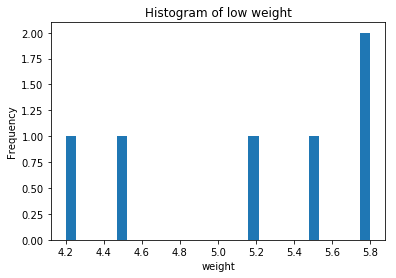

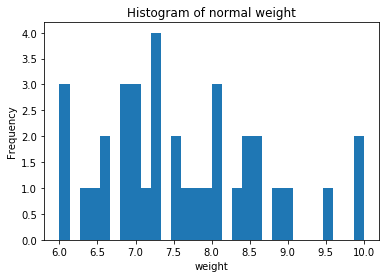

This is a hypothesis test for the homogeneity of variance assumption
H0:The variances of low and normal weight are equal
test statistics: 1.2669198389685288
pvalue: 0.26705370102796117
Decision: Fail to reject the null hypothesis
Conclusion: The variances of low and normal weight are equal
Proceed to perform a t-test
T Test: This is a hypothesis test for means of male and female faculty salary
H0: Means of low and normal are equal
test statistics (t): -5.435711661123188
pvalue: 2.9285639997008615e-06
Decision: Reject the null hypothesis
Conclusion: Means of low and normal weight are unequal


In [40]:
# t-test
response1 = urllib.request.urlopen("https://raw.githubusercontent.com/fenghuanghao1986/.spyder-py3/master/birthweight_reduced.csv")
data1 = pd.read_csv(response1)
# research question: what's the difference between low and normal weight?
# extract weight for low and normal
lowweight = data1.Birthweight[data1.LowBirthWeight=="Low"]
norweight = data1.Birthweight[data1.LowBirthWeight=="Normal"]
# compute the mean of weight for both status
data1[["Birthweight", "LowBirthWeight"]].groupby("LowBirthWeight").mean()
# visualize the distribution of low and normal weight
# histogram
plt.hist(lowweight, bins = 30)
plt.title("Histogram of low weight")
plt.xlabel("weight")
plt.ylabel("Frequency")
plt.show()

plt.hist(norweight, bins = 30)
plt.title("Histogram of normal weight")
plt.xlabel("weight")
plt.ylabel("Frequency")
plt.show()
# levene's test 
teststats_Var, pvalue_Var = stats.levene(lowweight, norweight)
print("This is a hypothesis test for the homogeneity of variance assumption")
print("H0:The variances of low and normal weight are equal")
print (f"test statistics: {teststats_Var}")
print(f"pvalue: {pvalue_Var}")

alpha = 0.05
if pvalue_Var > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: The variances of low and normal weight are equal")
    print("Proceed to perform a t-test")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: The variances of low and normal weight are unequal")
    print("Proceed to do a Welch's test since variances are unequal")
# t-test
teststats_Mean, pvalue_Mean= stats.ttest_ind(lowweight, norweight, equal_var=True)

print("T Test: This is a hypothesis test for means of male and female faculty salary")
print("H0: Means of low and normal are equal")
print (f"test statistics (t): {teststats_Mean}")
print(f"pvalue: {pvalue_Mean}")

alpha = 0.05
if pvalue_Mean > alpha:
    print("Decision: Fail to reject the null hypothesis")
    print("Conclusion: Means of low and normal weight are equal")
else:
    print("Decision: Reject the null hypothesis")
    print("Conclusion: Means of low and normal weight are unequal")


In [35]:
# beautiful soup
quote_page = 'http://www.bloomberg.com/quote/SPX:IND'
page = urllib.request.urlopen(quote_page)
soup = BeautifulSoup(page, 'html.parser')
print(soup)

<!DOCTYPE html>

<html data-view-uid="0" xmlns:og="http://ogp.me/ns#"><head>
<base href="https://www.bloomberg.com/"/><script data-view-uid="0_5" src="https://assets.bwbx.io/markets/public/javascripts/ab_test-96c65c2b0d.js"></script> <meta charset="utf-8"/> <title>SPX Quote - S&amp;P 500 Index - Bloomberg Markets</title><meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">!function(e,t){function u(){return t.getElementById("bb-nav")}function M(){return document.querySelector(".bb-unsupported-message__text")}function L(){var e=document.getElementById("bb_unsupported_custom_message");if(e)return JSON.parse(e.innerHTML).message}function o(){var o='body.bb-unsupported-browser .bb-nav-placeholder{height:auto}body.bb-unsupported-browser #bb-that,body.bb-unsupported-browser .bb-nav-root{display:none;height:auto}body.bb-unsupported-browser .bb-nav-root{display:block}.bb-unsupported-message{background-color:#000;padding:20px 0}@media screen and (max-width: 63.687